In [148]:
import pandas as pd 
import numpy as np 


import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")
 

In [149]:
df=pd.read_excel('marketing_campaign1.xlsx')  

In [150]:
pd.set_option('display.max_columns', 35)
df.head() 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [151]:
df.shape  

(2240, 29)

In [152]:
df.duplicated().sum()    # finding duplicate values  

0

In [153]:
df.isnull().sum()   # finding missing values   

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [154]:
# we have null values in income .
# replace null values with median  

In [155]:
# 1.07 % missing values in Income 

In [156]:
median= df['Income'].median()  # finding median of income 
print(median)     

51381.5


In [157]:
df['Income'] = df['Income'].fillna(median)   # replacing null values with median 

In [158]:
df.isna().sum()   # checking for null values 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [159]:
#  Univariate analysis - Categorical Data

<AxesSubplot:xlabel='Education', ylabel='count'>

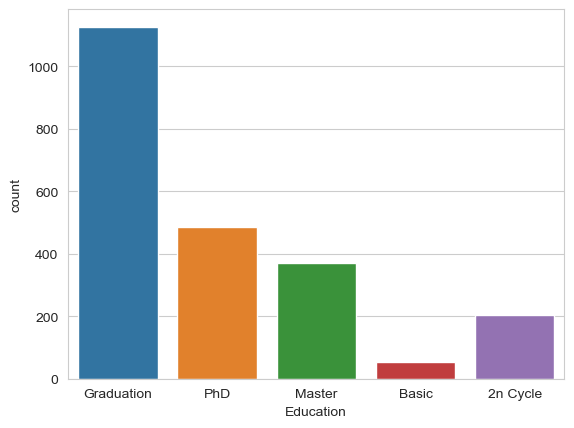

In [160]:
sns.set_style('whitegrid') 
sns.countplot(x ='Education',data=df)  
              # we have more no of customers who are graduates  

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

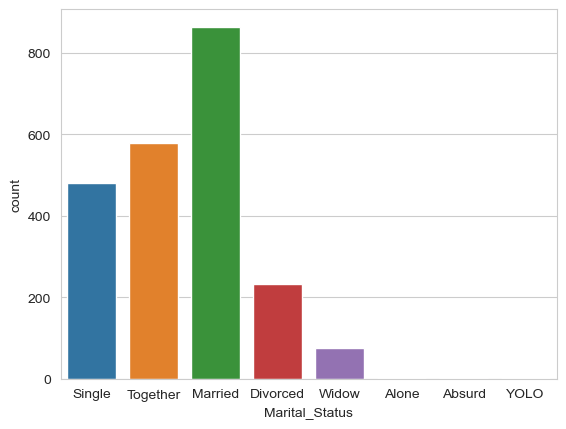

In [161]:
sns.set_style('whitegrid') 
sns.countplot(x='Marital_Status',data=df)   # we can mix  single , divorced , widow , alone , absurd,yolo   &  together , married

In [162]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married','Together'],'Couple')
df['Marital_Status'] = df['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'],'Single')    

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

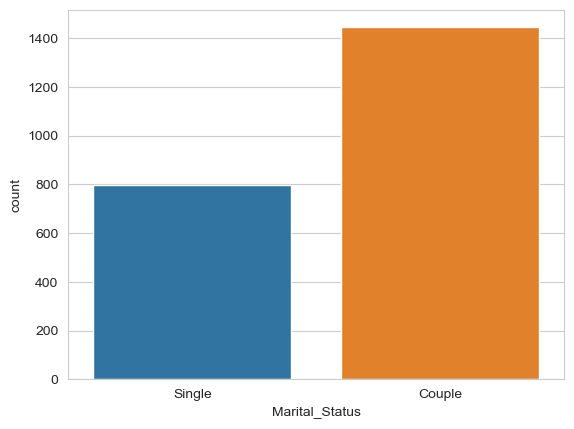

In [163]:
sns.set_style('whitegrid') 
sns.countplot(x='Marital_Status',data=df)    # we have more no of couple customers  

<AxesSubplot:xlabel='Kidhome', ylabel='count'>

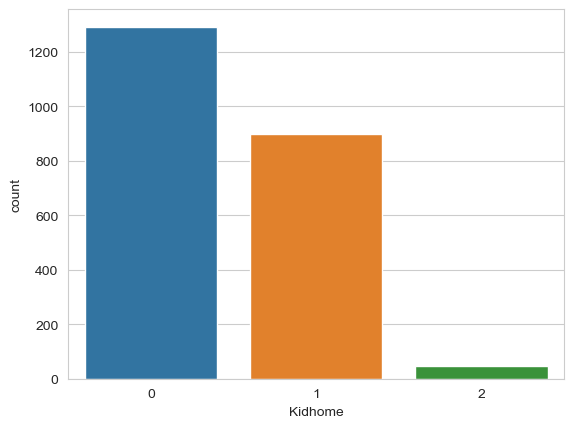

In [164]:
sns.set_style('whitegrid') 
sns.countplot(x='Kidhome',data=df)    
 # most customers do not have kids  

<AxesSubplot:xlabel='Teenhome', ylabel='count'>

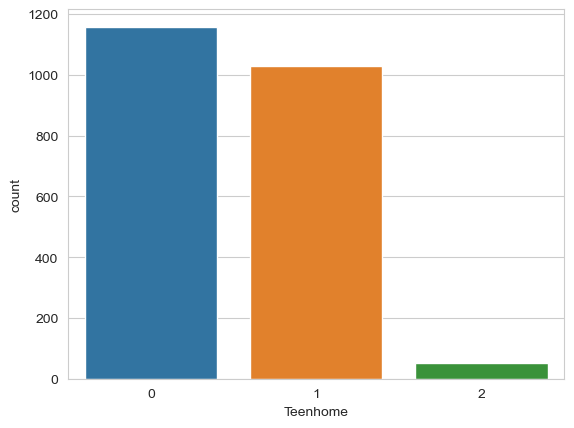

In [165]:
sns.set_style('whitegrid') 
sns.countplot(x='Teenhome',data=df)    

<AxesSubplot:xlabel='Complain', ylabel='count'>

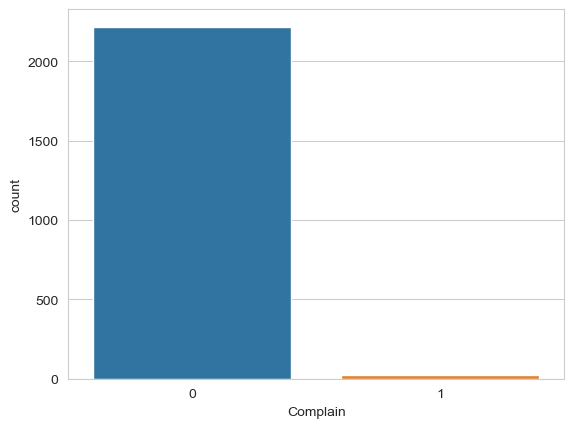

In [166]:
sns.set_style('whitegrid') 
sns.countplot(x='Complain',data=df)   # only few of our customers have complains  

In [167]:
df['Age'] = (2023 - df['Year_Birth'])  

In [168]:
# histogram for different numerical features  

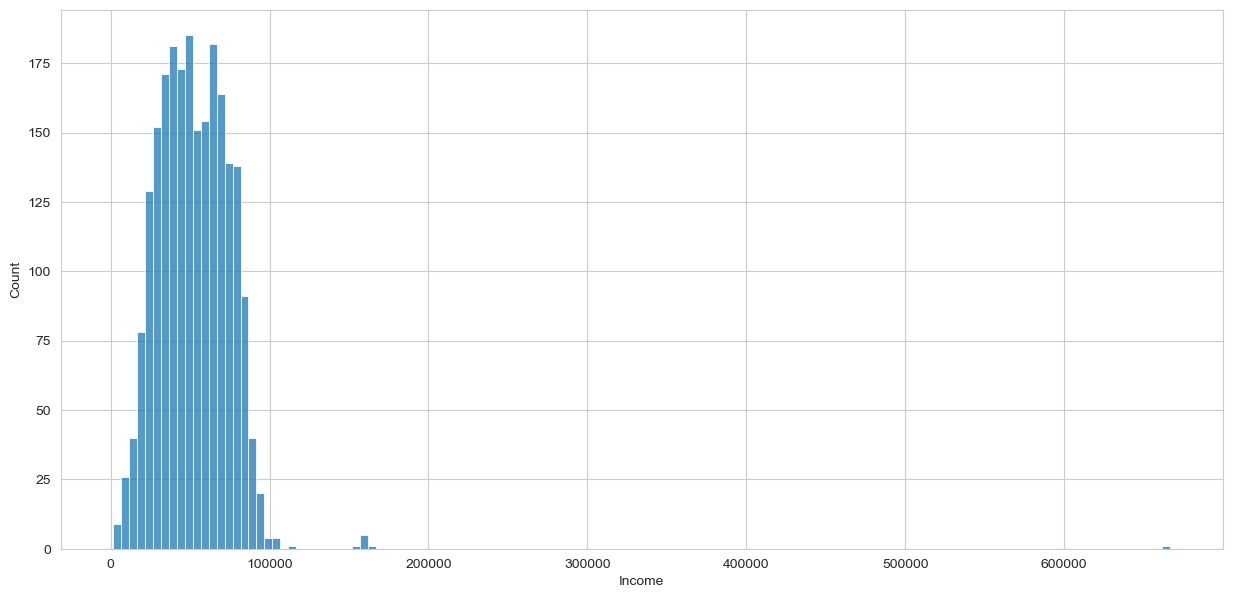

In [169]:
plt.figure(figsize=(15, 7))
sns.histplot(x=df['Income'], data=df)
plt.show()  

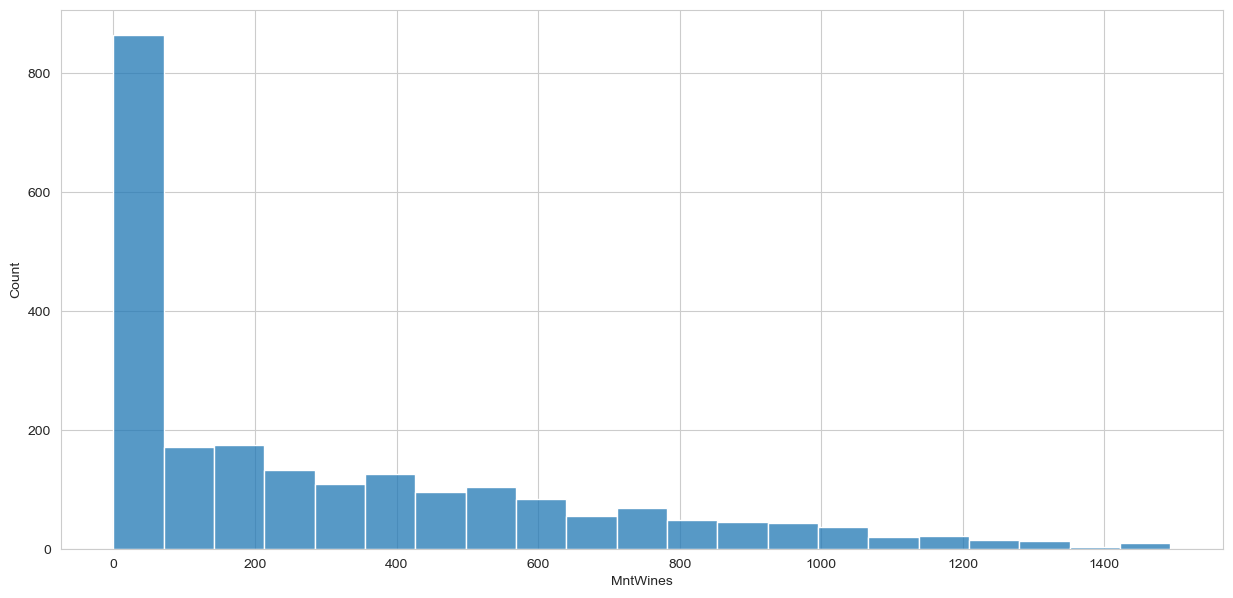

In [170]:
# Plot the histogram for 'MntWines'

plt.figure(figsize=(15, 7))
sns.histplot(x=df['MntWines'], data=df)
plt.show() 

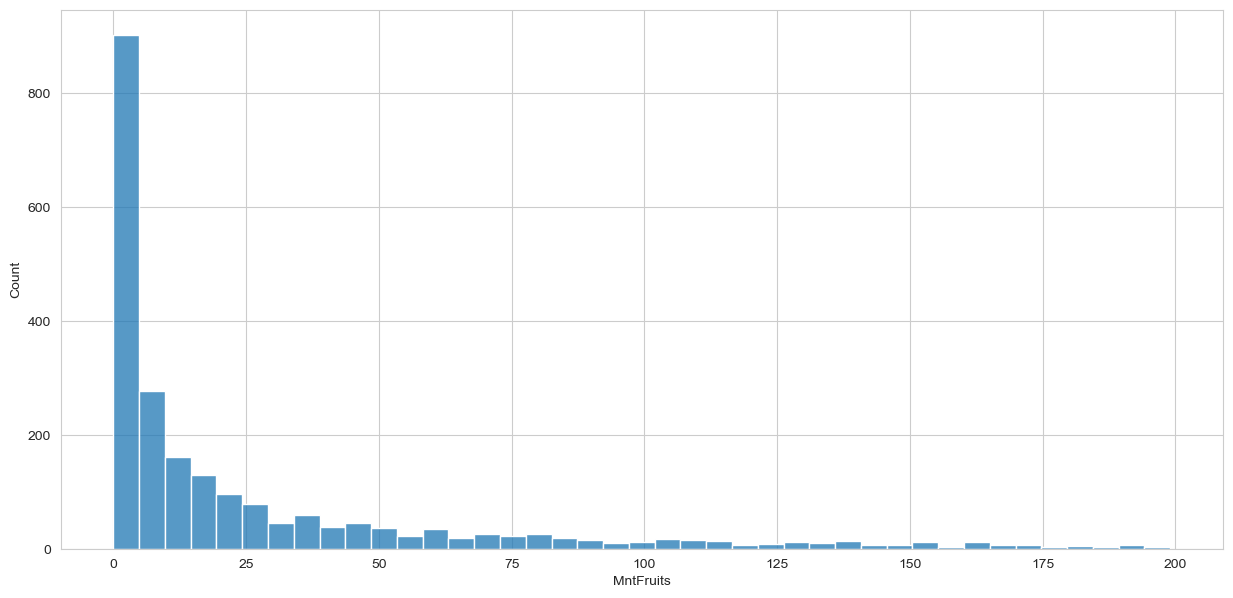

In [171]:
# Plot the histogram for 'MntFruits'

plt.figure(figsize=(15, 7))
sns.histplot(x=df['MntFruits'], data=df)
plt.show()  


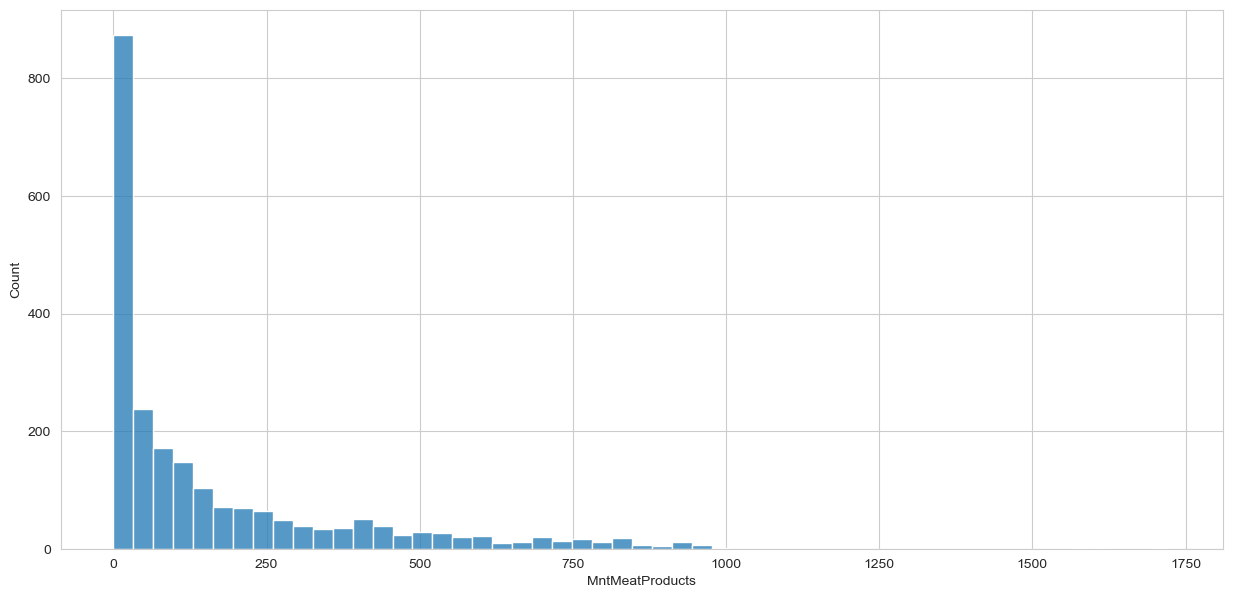

In [172]:
# Plot the histogram for 'MntMeatProducts' 

plt.figure(figsize=(15, 7))
sns.histplot(x=df['MntMeatProducts'], data=df)
plt.show() 

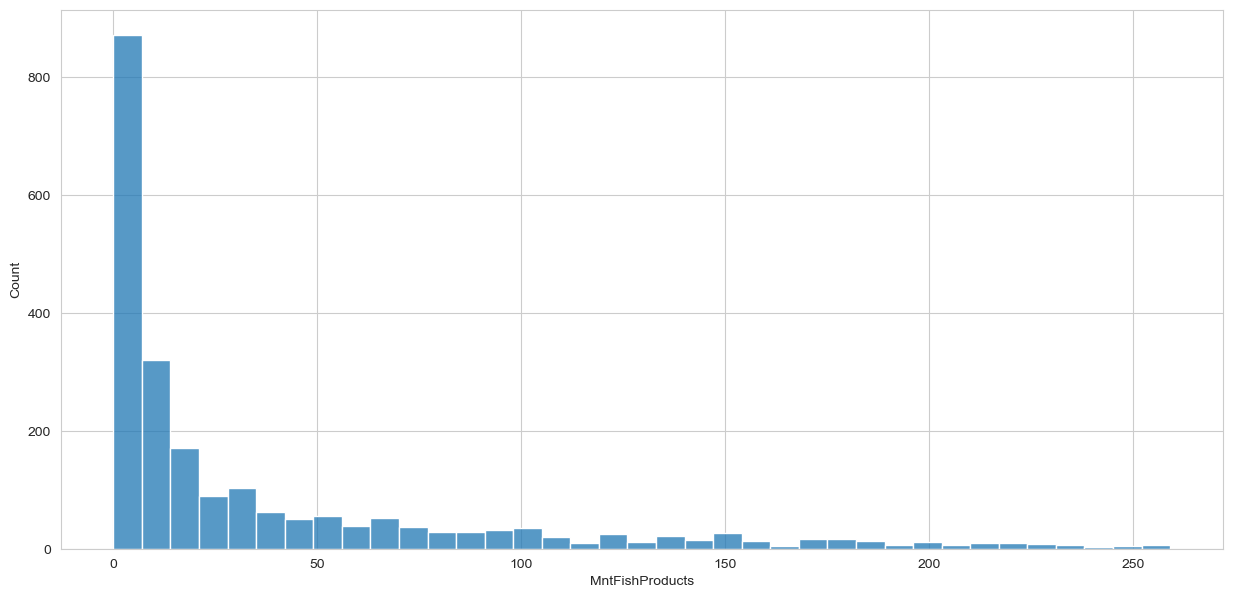

In [173]:
# Plot the histogram for 'MntFishProduct'

plt.figure(figsize=(15, 7))
sns.histplot(x=df['MntFishProducts'], data=df)
plt.show() 

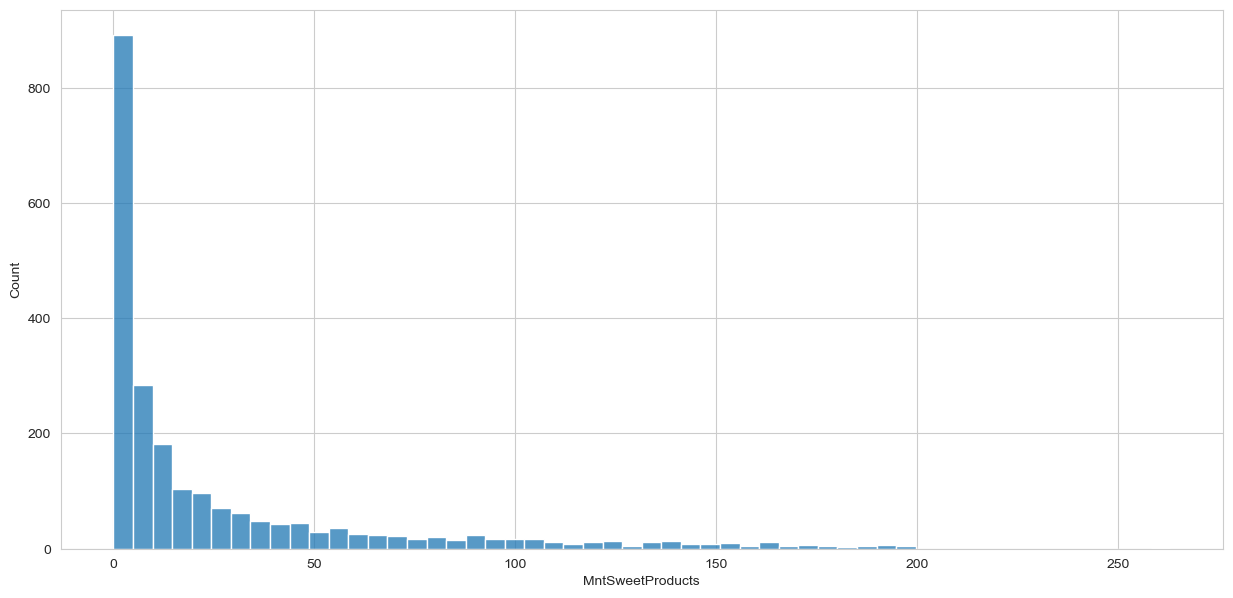

In [174]:
# Plot the histogram for 'MntSweetProducts'

plt.figure(figsize=(15, 7))
sns.histplot(x=df['MntSweetProducts'], data=df)
plt.show() 

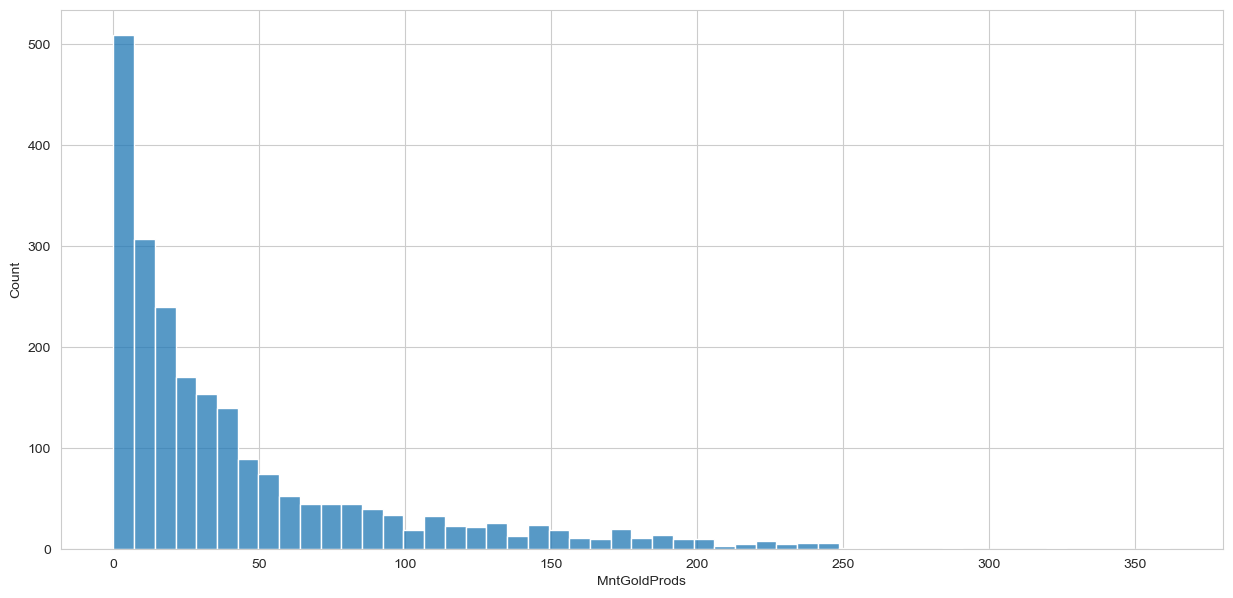

In [175]:
# Plot the histogram for 'MntGoldProducts'

plt.figure(figsize=(15, 7))
sns.histplot(x=df['MntGoldProds'], data=df)
plt.show()  

<AxesSubplot:xlabel='Income'>

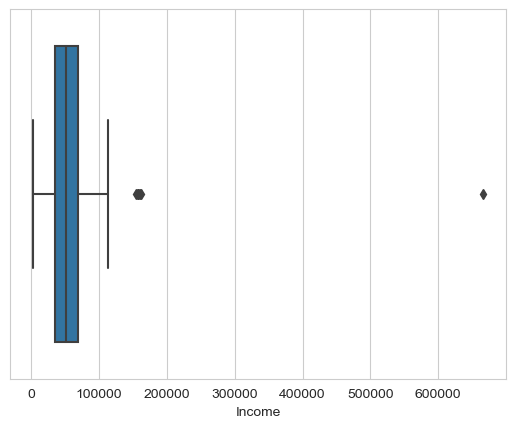

In [176]:
sns.set_style('whitegrid') 
sns.boxplot(df['Income'])    

<AxesSubplot:xlabel='Age'>

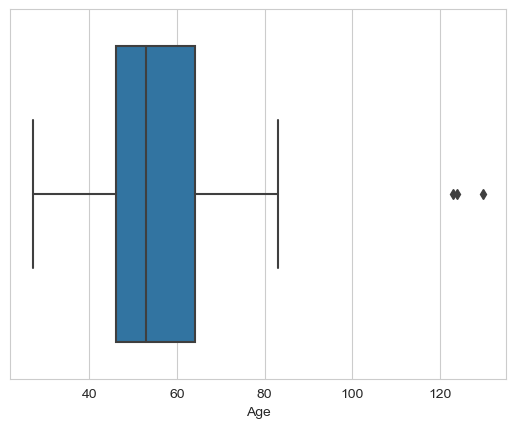

In [177]:
sns.set_style('whitegrid') 
sns.boxplot(df['Age'])     

In [178]:
# removing outliers   ( Feature Engineering)

In [179]:
Q1 = df.Income.quantile(0.25)
Q3 = df.Income.quantile(0.75)
Q1,Q3   

(35538.75, 68289.75)

In [180]:
IQR = Q3 - Q1 
IQR   

32751.0

In [181]:
upper_limit = Q3 + (1.5*IQR) 
lower_limit  = Q1 - (1.5*IQR)  
upper_limit, lower_limit         # finding upper limit & lower limit 

(117416.25, -13587.75)

In [182]:
df[(df.Income>upper_limit) | (df.Income < lower_limit)]  # outliers  

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
164,8475,1973,PhD,Couple,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0,50
617,1503,1976,PhD,Couple,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0,47
655,5555,1975,Graduation,Single,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,48
687,1501,1982,PhD,Couple,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,41
1300,5336,1971,Master,Couple,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0,52
1653,4931,1977,Graduation,Couple,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0,46
2132,11181,1949,PhD,Couple,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,74
2233,9432,1977,Graduation,Couple,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0,46


In [183]:
# we have 0.3% outliers so removing those rows 

In [184]:
# REMOVING OUTLIERS and form new data frame df1  

In [185]:
df1 = df[(df.Income<upper_limit) & (df.Income > lower_limit)]   

<AxesSubplot:xlabel='Income'>

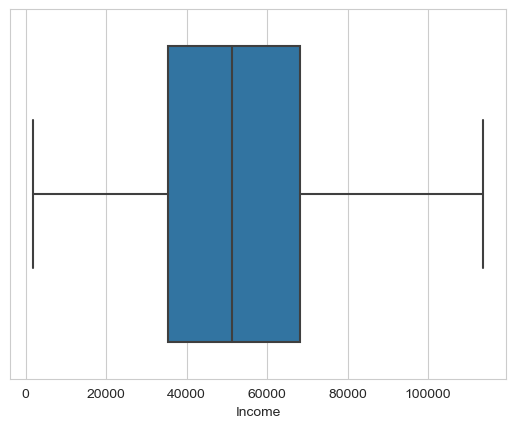

In [186]:
sns.set_style('whitegrid') 
sns.boxplot(df1['Income'])     

In [187]:
df1['Age'].describe()   

count    2232.000000
mean       54.207437
std        11.990340
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [188]:
# q1 = 46 , q3 = 64 
# IQR = q3 -q1 = 18  

In [189]:
upper_limit1 = 64 + (1.5* 18)
lower_limit1 = 46 - (1.5*18 )
upper_limit1, lower_limit1   

(91.0, 19.0)

In [190]:
df1[(df1.Age>upper_limit1) | (df1.Age < lower_limit1)]   

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Single,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,123
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,130
339,1150,1899,PhD,Couple,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,124


In [191]:
# Removing those outliers rows   

In [192]:
df2 = df1[(df1.Age<upper_limit1) & (df1.Age > lower_limit1)]  
df2   

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Couple,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Couple,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Couple,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Couple,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56
2236,4001,1946,PhD,Couple,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77
2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42
2238,8235,1956,Master,Couple,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67


<AxesSubplot:xlabel='Age'>

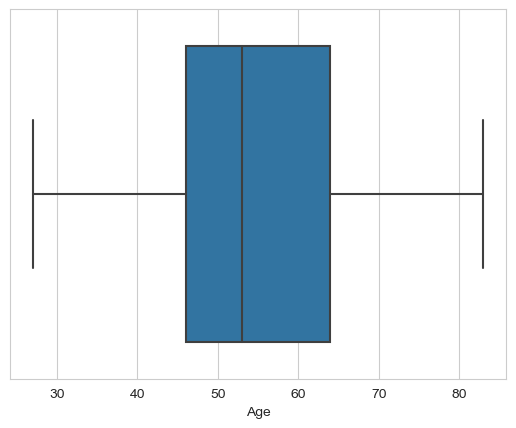

In [193]:
sns.set_style('whitegrid') 
sns.boxplot(df2['Age']) 

In [194]:
# adding new colum "total_expense" it includes all the pruchases made by customer
#  "total_accepted" it includes total no of offers accepted by customer during all campaigns
# adding new column total_purchase which includes all modes of purchases  

In [195]:
df2['total_expense'] = (df2['MntWines'] + df2['MntFruits'] + df2['MntMeatProducts'] + df2['MntFishProducts'] + df2['MntSweetProducts'] + df2['NumDealsPurchases'] )
df2['total_accepted'] = (df2['AcceptedCmp1'] + df2['AcceptedCmp2'] + df2['AcceptedCmp3'] + df2['AcceptedCmp4'] + df2['AcceptedCmp5'] )    
df2['total_purchase']= (df2['NumWebPurchases']  + df2['NumCatalogPurchases'] + df2['NumStorePurchases'] )    

In [196]:
# Z_CostContact , Z_Revenue    has no varience ... so removing those columns 

In [197]:
df3= df2.drop(['Z_CostContact','Z_Revenue'], axis=1)   

In [198]:
# Converting Dt_customer variable to Python date time object
df3["Dt_Customer"] = pd.to_datetime(df3.Dt_Customer)  

In [199]:
df3["Dt_Customer"].min()  

Timestamp('2012-07-30 00:00:00')

In [200]:
df3["Dt_Customer"].max()   

Timestamp('2014-06-29 00:00:00')

In [201]:
 # Assigning date to the day variable
df3["day"] = "01-01-2015"                         

# Converting the variable day to Python datetime object
df3["day"] = pd.to_datetime(df3.day)                 

In [202]:
df3["Engaged_in_days"] = (df3["day"] - df3["Dt_Customer"]).dt.days     

In [203]:
# # Divide the "Expenses" by "NumTotalPurchases" to create the new feature AmountPerPurchase 
df3['AmountPerPurchase'] = df3['total_expense'] / df3['total_purchase']  

In [204]:
df3['AmountPerPurchase'].max()  

inf

In [205]:
df3['total_purchase'].sort_values() == 0    

1846     True
1524     True
1245     True
981      True
1042    False
        ...  
636     False
67      False
1252    False
1669    False
412     False
Name: total_purchase, Length: 2229, dtype: bool

In [206]:
# Drop the observations with NumTotalPurchases equal to 0, using their indices

df3.drop(index=[1846,1524,1245,981], inplace = True)   

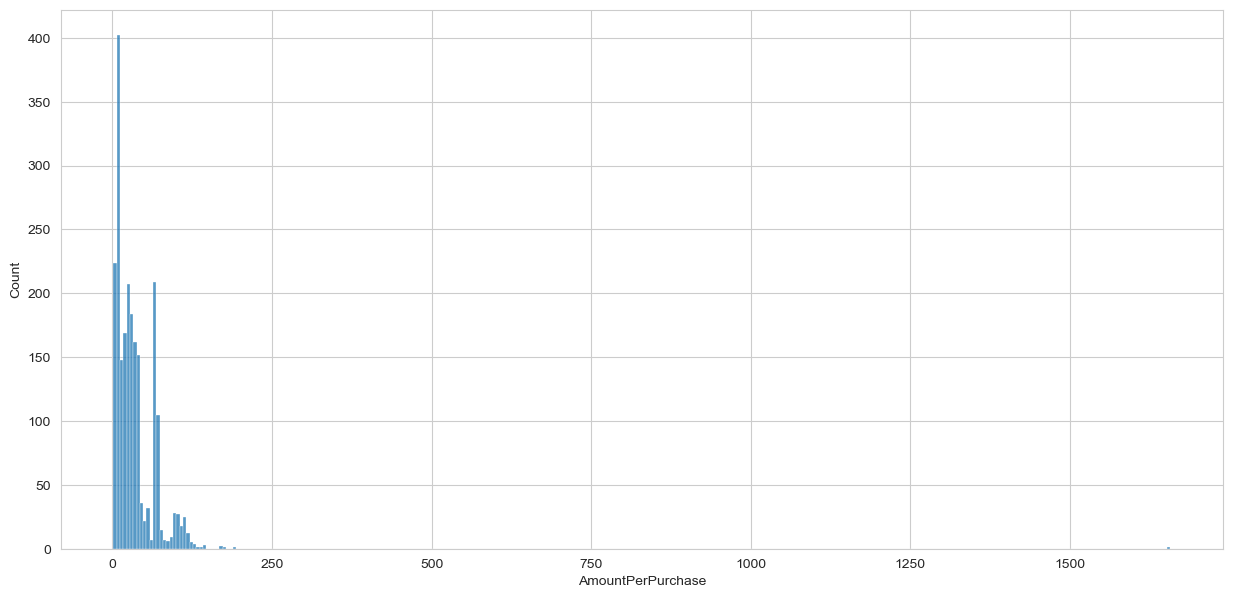

In [207]:

plt.figure(figsize=(15, 7))
sns.histplot(x=df3['AmountPerPurchase'], data=df3)
plt.show()   

In [208]:
df3['AmountPerPurchase'].describe()  

count    2225.000000
mean       35.122126
std        44.893391
min         1.520000
25%        10.500000
50%        26.615385
75%        44.428571
max      1657.000000
Name: AmountPerPurchase, dtype: float64

In [209]:
# Correlation Heat map 

<AxesSubplot:>

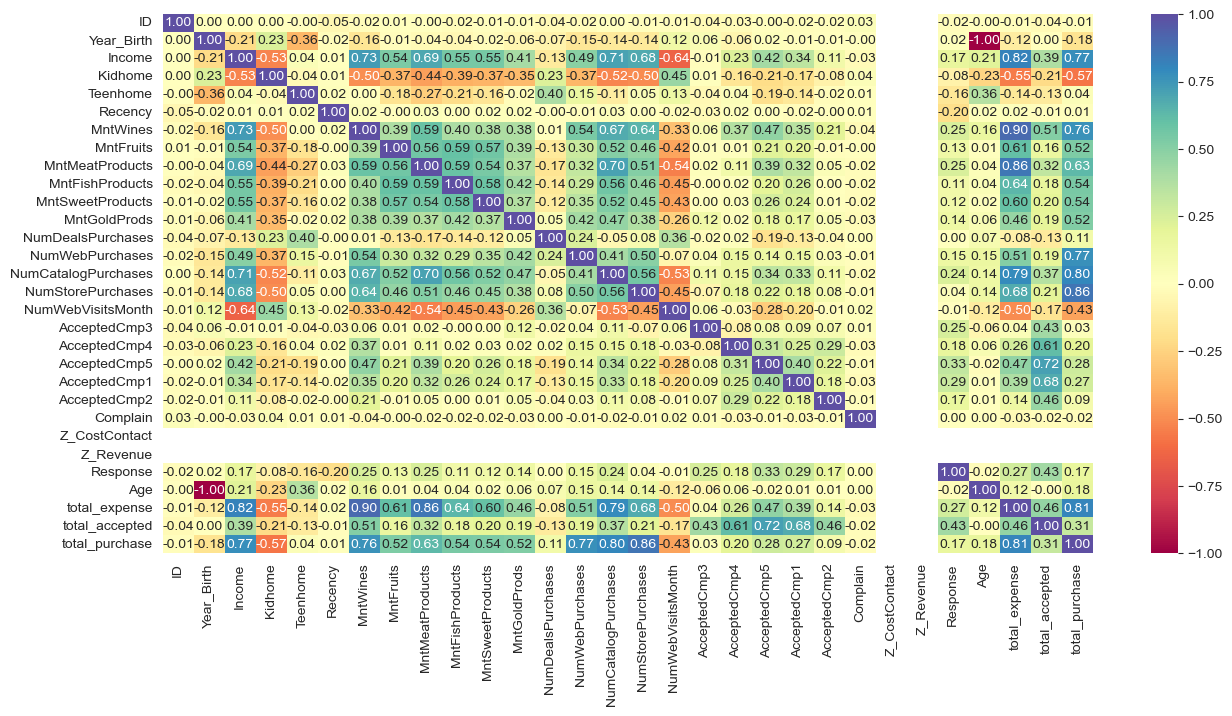

In [210]:
plt.figure(figsize=(15, 7))                                                        
sns.heatmap(df2.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")   

In [211]:
# Education Vs Income 

AxesSubplot(0.125,0.11;0.775x0.77)


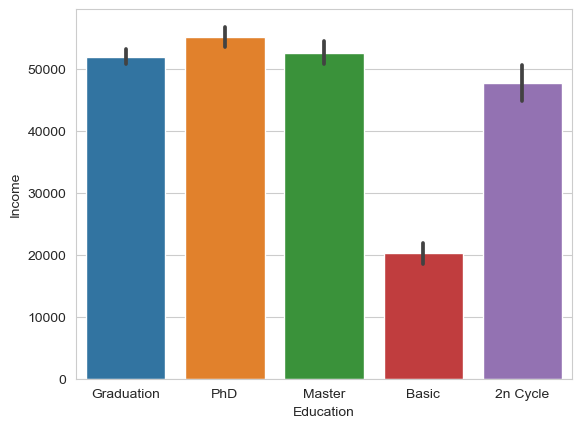

In [212]:
print(sns.barplot(x='Education', y='Income', data=df2))  

In [213]:
# Marital Status Vs Income

AxesSubplot(0.125,0.11;0.775x0.77)


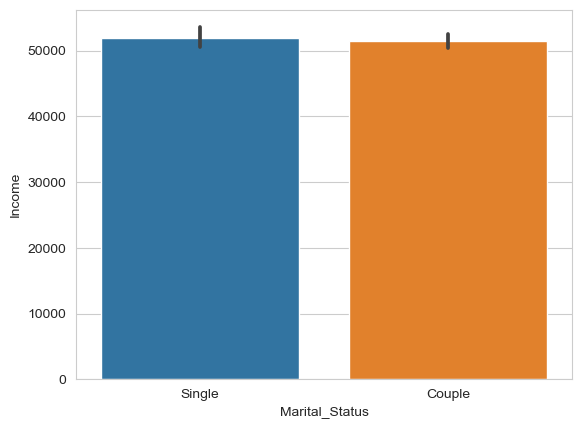

In [214]:
print(sns.barplot(x='Marital_Status', y='Income', data=df2))  

In [215]:
#  have a similar income on average regardless of their marital status 

In [216]:
# Kidhome Vs Income 

AxesSubplot(0.125,0.11;0.775x0.77)


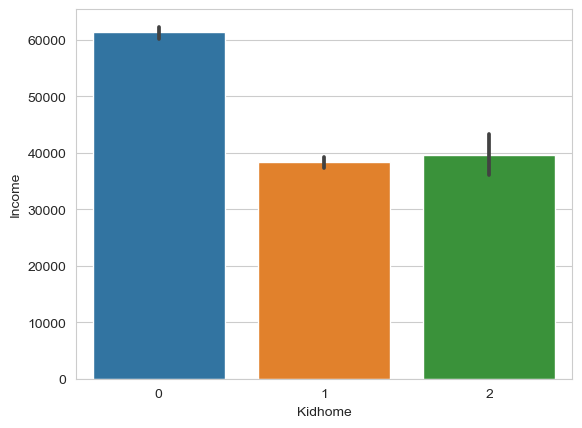

In [217]:
print(sns.barplot(x='Kidhome', y='Income', data=df2))  

In [218]:
# Customers with 0  children  have a higher income  compared to those with 1 or 2 small children.

In [219]:
# Marital_Status Vs Kidhome 

<AxesSubplot:xlabel='Marital_Status'>

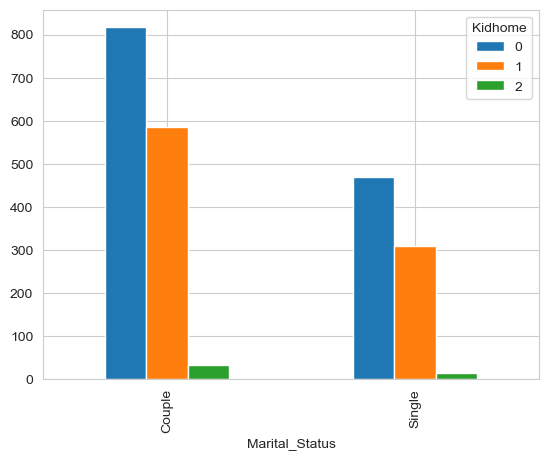

In [220]:
pd.crosstab(df2.Marital_Status,df2.Kidhome).plot(kind='bar',stacked=False)  

In [221]:
# Dropping columns that we will not use for segmentation

In [222]:
data = df3.drop(['ID','Year_Birth','Education','Marital_Status','Dt_Customer','day','Complain','Response','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Kidhome','Teenhome','Age'],axis=1 )     

In [223]:
data1= data.copy() 

In [224]:
# before applying k mean we have to  Standardize the data  

In [225]:
scaler = StandardScaler()                                               
data_scaled = scaler.fit_transform(data)                                       
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)      # Converting the embeddings to a dataframe

data_scaled.head()  

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,total_expense,total_accepted,total_purchase,Engaged_in_days,AmountPerPurchase
0,0.313547,0.306756,0.978382,1.548807,1.734121,2.454376,1.470100,0.840965,0.371323,1.404314,2.632031,-0.563510,0.713131,1.681819,-0.440226,1.315542,1.528763,0.768977
1,-0.261383,-0.383996,-0.874656,-0.638440,-0.727425,-0.652632,-0.633823,-0.733105,-0.167265,-1.121052,-0.587075,-1.181760,-0.132667,-0.941940,-0.440226,-1.196016,-1.194012,-0.654411
2,0.970423,-0.798447,0.357734,0.568317,-0.175857,1.339509,-0.150163,-0.042050,-0.705852,1.404314,-0.229396,1.291239,-0.555566,0.296043,-0.440226,1.036480,-0.208862,0.036269
3,-1.221616,-0.798447,-0.874656,-0.563018,-0.663607,-0.506420,-0.585457,-0.752301,-0.167265,-0.760285,-0.944753,-0.563510,0.290232,-0.894994,-0.440226,-0.916954,-1.065299,-0.596854
4,0.321103,1.550110,-0.393578,0.417472,-0.216882,0.151535,-0.005065,-0.560341,1.448497,0.322015,0.128282,0.054739,-0.132667,-0.265570,-0.440226,0.199294,-0.956388,-0.126852


In [226]:
# PCA 

In [227]:
# Defining the number of principal components to generate
n = data.shape[1]                                        # Storing the number of variables in the data

pca = PCA(n_components=n, random_state = 1)                                        # Initialize PCA with n_components = n and random_state=1

data_pca = pd.DataFrame(pca.fit_transform(data_scaled))                      # fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_                   

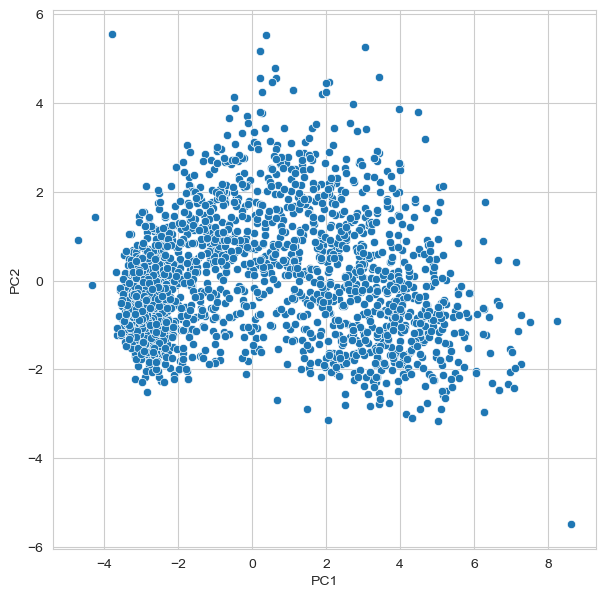

In [228]:
# Scatter plot for two components using the dataframe data_pca
plt.figure(figsize = (7, 7))

sns.scatterplot(x = data_pca[0], y = data_pca[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()  

In [229]:
distortions = []                                                  # Create an empty list

K = range(2, 11)                                                  # Setting the K range from 2 to 11

for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=4)              # Initialize K-Means
    kmeanModel.fit(data_pca)                                      # Fit K-Means on the data
    distortions.append(kmeanModel.inertia_)                        # Append distortion values to the empty list created above 

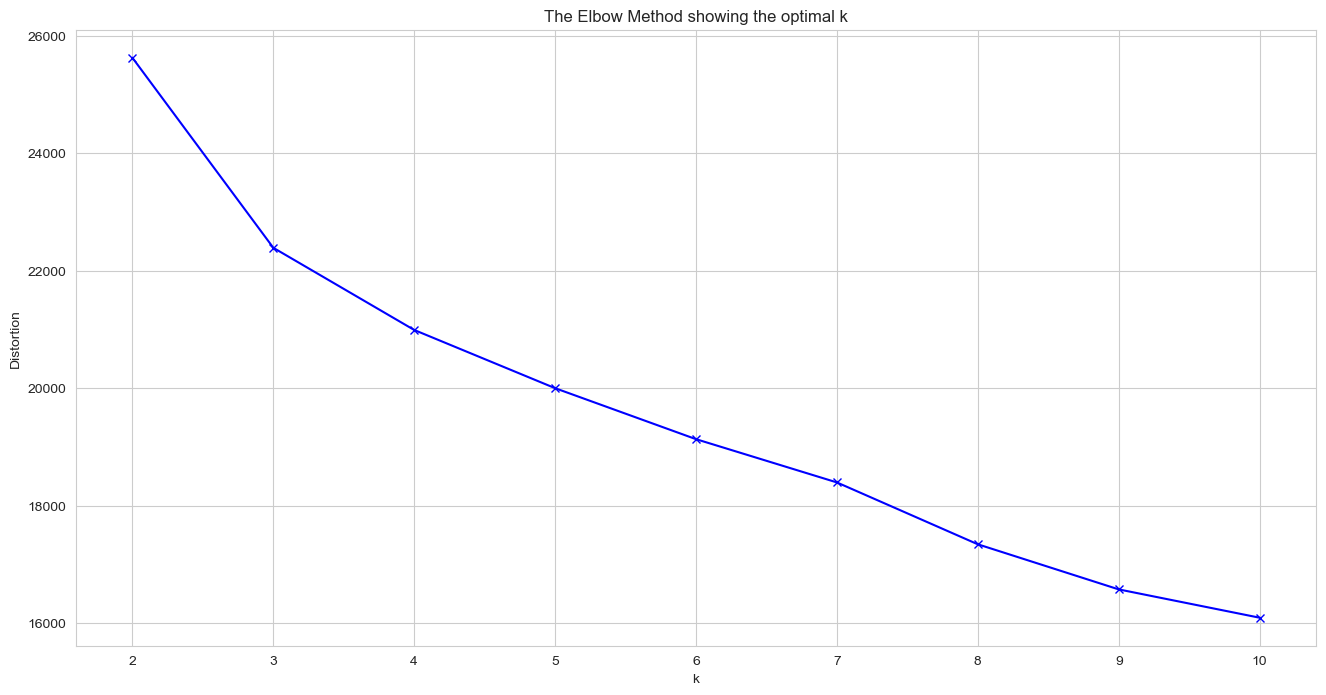

In [230]:
# Plotting the elbow plot
plt.figure(figsize=(16, 8))                                            # Setting the plot size

plt.plot(K, distortions, "bx-")                                        # Plotting the K on X-axis and distortions on y-axis

plt.xlabel("k")                                                        # Title of x-axis

plt.ylabel("Distortion")                                               # Title of y-axis

plt.title("The Elbow Method showing the optimal k")                    # Title of the plot
plt.show()  

In [231]:
sil_score = []                                                             # Creating empty list
cluster_list = range(3, 7)                                                 # Creating a range from 3 to 7
for n_clusters in cluster_list:
    
    # Initialize K-Means with number of clusters equal to n_clusters and random_state=1
    clusterer = KMeans(n_clusters = k, random_state = 1).fit(data_pca)
    
    # Fit and predict on the pca data
    preds = clusterer.fit_predict(data_pca) 
    
    # Calculate silhouette score - Hint: Use silhouette_score() function
    score = silhouette_score(data_pca, preds)  
    
    # Append silhouette score to empty list created above
    sil_score.append(score)   
    
    # Print the silhouette score
    print( "For n_clusters = {}, the silhouette score is {}".format(n_clusters, score))   

For n_clusters = 3, the silhouette score is 0.12684955662090078
For n_clusters = 4, the silhouette score is 0.12684955662090078
For n_clusters = 5, the silhouette score is 0.12684955662090078
For n_clusters = 6, the silhouette score is 0.12684955662090078


In [232]:
# kmean (on pca )  

In [233]:
kmeans = KMeans(n_clusters = 3, random_state = 42)                                # Initialize the K-Means algorithm with 3 clusters and random_state=1

kmeans.fit(data_pca)                                     # Fitting on the data_pca  

KMeans(n_clusters=3, random_state=42)

In [234]:
data_pca["K_means_segments_3"] = kmeans.labels_                    # Adding K-Means cluster labels to the data_pca data

data1["K_means_segments_3"] = kmeans.labels_                        # Adding K-Means cluster labels to the whole data

data["K_means_segments_3"] = kmeans.labels_                    # Adding K-Means cluster labels to data_model 

In [235]:
data["K_means_segments_3"].value_counts()  

1    1042
2     601
0     582
Name: K_means_segments_3, dtype: int64

In [236]:
data["K_means_segments_3"].value_counts()  

1    1042
2     601
0     582
Name: K_means_segments_3, dtype: int64

In [237]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=Y, data=PCA, hue=cluster) 

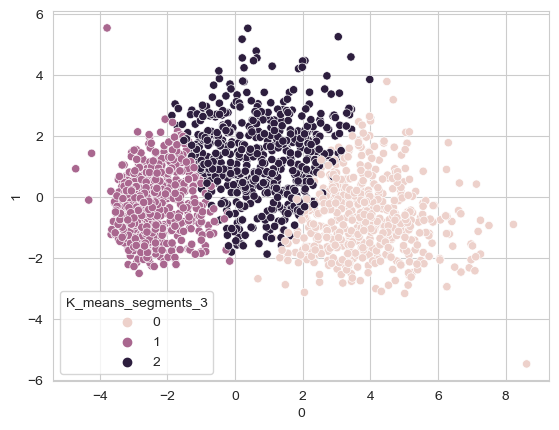

In [238]:
PCA_PLOT(data_pca[0], data_pca[1], data_pca, "K_means_segments_3")  

In [239]:
# Taking the cluster-wise mean of all the variables. Hint: First groupby 'data' by 'K_means_segments_3' and then find mean
cluster_profile_KMeans_3 = data.groupby('K_means_segments_3').mean()  

In [240]:
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_3.style.highlight_max(color="lightgreen", axis=0)  

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,total_expense,total_accepted,total_purchase,Engaged_in_days,AmountPerPurchase
K_means_segments_3,,,,,,,,,,,,,,,,,,
0,75918.766323,50.309278,639.092784,68.630584,454.659794,100.355670,70.240550,78.457045,1.343643,5.242268,5.984536,8.365979,2.938144,1334.323024,0.728522,19.592784,546.632302,73.659208
1,34921.629079,49.148752,43.095010,4.865643,22.722649,7.190979,5.047025,15.227447,2.013436,2.119002,0.558541,3.255278,6.401152,84.934741,0.087332,5.932821,505.706334,12.464778
2,57358.900998,47.911814,437.535774,22.820300,133.316140,29.953411,23.963394,61.222962,3.762063,6.455907,3.014975,7.811980,5.728785,651.351082,0.251248,17.282862,593.738769,37.086144


In [241]:
# Dropping labels we got from K=3 since we will be using PCA data for prediction
# Drop K_means_segments_3. Hint: Use axis=1 and inplace=True
data_pca.drop(['K_means_segments_3'], axis=1, inplace=True)
data.drop(['K_means_segments_3'], axis=1, inplace=True)  

In [242]:
# separating the data and labels
X = data1.drop(columns = 'K_means_segments_3', axis=1)
Y = data1['K_means_segments_3'] 

In [243]:
# Train Test Split 

In [244]:
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.metrics import accuracy_score 

In [245]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2) 

In [246]:
# Training the Model 

In [247]:
classifier = svm.SVC(kernel='linear')  

In [248]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train) 

SVC(kernel='linear')

In [249]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) 

In [250]:
print('Accuracy score of the training data : ', training_data_accuracy) 

Accuracy score of the training data :  0.9646067415730337


In [251]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 

In [252]:
print('Accuracy score of the test data : ', test_data_accuracy) 

Accuracy score of the test data :  0.9662921348314607


In [253]:
data1.head() 

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,total_expense,total_accepted,total_purchase,Engaged_in_days,AmountPerPurchase,K_means_segments_3
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,1532,0,22,849,69.636364,0
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,23,0,4,299,5.750000,1
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,735,0,20,498,36.750000,2
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,50,0,6,325,8.333333,1
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,412,0,14,347,29.428571,2


In [254]:
data1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2225 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2225 non-null   float64
 1   Recency              2225 non-null   int64  
 2   MntWines             2225 non-null   int64  
 3   MntFruits            2225 non-null   int64  
 4   MntMeatProducts      2225 non-null   int64  
 5   MntFishProducts      2225 non-null   int64  
 6   MntSweetProducts     2225 non-null   int64  
 7   MntGoldProds         2225 non-null   int64  
 8   NumDealsPurchases    2225 non-null   int64  
 9   NumWebPurchases      2225 non-null   int64  
 10  NumCatalogPurchases  2225 non-null   int64  
 11  NumStorePurchases    2225 non-null   int64  
 12  NumWebVisitsMonth    2225 non-null   int64  
 13  total_expense        2225 non-null   int64  
 14  total_accepted       2225 non-null   int64  
 15  total_purchase       2225 non-null   i

In [255]:
# prediction system

In [256]:
input_data =(52458,50,166,72,19,175,25,35,5,3,1,15,5,1532,0,22,222,69.636)
new_point= np.asarray(input_data)
new_point = new_point.reshape(1,-1)

new_point_std = scaler.transform(new_point)
new_point_pca = pca.transform(new_point_std)
predicted_cluster = kmeans.predict(new_point_pca)
print(predicted_cluster)  

if (predicted_cluster[0] == 0):
  print('customer with high expense ')
elif (predicted_cluster[0] == 1):
  print('customer with low expense')
else :
  print('customer with moderate expense')


[2]
customer with moderate expense


In [257]:
# savinng the model 

In [258]:
import pickle 

In [259]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb')) 

In [260]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb')) 

In [261]:
input_data =(52458,50,166,72,19,175,25,35,5,3,1,15,5,1532,0,22,222,69.636)
new_point= np.asarray(input_data)
new_point = new_point.reshape(1,-1)

new_point_std = scaler.transform(new_point)
new_point_pca = pca.transform(new_point_std)
predicted_cluster = kmeans.predict(new_point_pca)
print(predicted_cluster)  

if (predicted_cluster[0] == 0):
  print('customer with high expense ')
elif (predicted_cluster[0] == 1):
  print('customer with low expense')
else :
  print('customer with moderate expense')


[2]
customer with moderate expense
